In [1]:
import pandas as pd
import numpy as np
import math
from scipy.linalg import expm, sinm, cosm

In [2]:
bonds=pd.read_csv("bonds.csv")
bonds

,Maturity,Coupon,Price
0,1,0.010,1
1,2,0.020,1
2,3,0.026,1
3,5,0.034,1


In [3]:
bonds['Maturity'].max()

5

## Get Bond Cashflows. 
### Coupon + Principal

In [4]:
cf=pd.DataFrame(index=range(bonds['Maturity'].max()),columns=range(1,len(bonds)+1))
cf

,1,2,3,4
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


In [5]:
for i in range(0,len(bonds)):
    mat=bonds['Maturity'][i]
    cf.iloc[0:mat,i]=bonds['Coupon'][i]
cf.fillna(0,inplace=True)
cf

,1,2,3,4
0,0.01,0.02,0.026,0.034
1,0.00,0.02,0.026,0.034
2,0.00,0.00,0.026,0.034
3,0.00,0.00,0.000,0.034
4,0.00,0.00,0.000,0.034


In [6]:
principal=pd.DataFrame(index=range(bonds['Maturity'].max()),columns=range(1,len(bonds)+1))
principal

,1,2,3,4
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


In [7]:
for i in range(0,len(bonds)):
    mat=bonds['Maturity'][i]
    principal.iloc[mat-1,i]=1
principal.fillna(0,inplace=True)
principal

,1,2,3,4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,0
4,0,0,0,1


In [8]:
C=principal+cf
C

,1,2,3,4
0,1.01,0.02,0.026,0.034
1,0.00,1.02,0.026,0.034
2,0.00,0.00,1.026,0.034
3,0.00,0.00,0.000,0.034
4,0.00,0.00,0.000,1.034


## Create the Time Matrix (T) and Maturity Matrix (U)

In [9]:
np.array(list(range(1,bonds['Maturity'].max()+1)))

array([1, 2, 3, 4, 5])

In [10]:
T=[]
for i in range(0,bonds['Maturity'].max()):
    T.append(list(range(1,len(bonds)+2)))
T=np.array(T)
T

array([[1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5]])

In [11]:
U=T.transpose()
U

array([[1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4],
       [5, 5, 5, 5, 5]])

## Compute t+u, min(t,u), max(t,u) for W

In [12]:
min_tuj=np.minimum(T,U)
max_tuj=np.maximum(T,U)
tuj=T+U

In [13]:
ufr=math.log(1+0.042)
a=0.1
m=bonds['Price']
m

0    1
1    1
2    1
3    1
Name: Price, dtype: int64

## Compute mu and W

In [14]:
mu=np.exp(-ufr*T[1])
mu

array([0.9596929 , 0.92101046, 0.8838872 , 0.84826027, 0.81406935])

In [15]:
second=(a*min_tuj)-(0.5*np.exp(-a*max_tuj))*(np.exp(a*min_tuj)-np.exp(-a*min_tuj))
W=np.exp(-ufr*tuj)*second
W

array([[0.00862561, 0.01590149, 0.02188057, 0.02674724, 0.03066104],
       [0.01590149, 0.02982485, 0.04139268, 0.05081327, 0.05839446],
       [0.02188057, 0.04139268, 0.05813003, 0.07188306, 0.08296295],
       [0.02674724, 0.05081327, 0.07188306, 0.08970176, 0.1041795 ],
       [0.03066104, 0.05839446, 0.08296295, 0.1041795 , 0.12189849]])

## Compute Zeta

In [16]:
first_term=np.linalg.inv(C.T@W@C)
sec_term=m-(C.T@mu).reset_index(drop=True)

In [17]:
zeta=first_term@sec_term
zeta

array([ 57.79068821, -33.50720775,  11.39647259,  -5.46696784])

## Build curve extend to 50 years

In [18]:
K=50

In [19]:
T=[]
for i in range(0,K):
    T.append(list(range(1,len(bonds)+2)))
T=np.array(T)
T.shape

(50, 5)

In [20]:
U=[]
for i in range(1,K+1):
    U.append((np.ones(5))*i)
U

[array([1., 1., 1., 1., 1.]),
 array([2., 2., 2., 2., 2.]),
 array([3., 3., 3., 3., 3.]),
 array([4., 4., 4., 4., 4.]),
 array([5., 5., 5., 5., 5.]),
 array([6., 6., 6., 6., 6.]),
 array([7., 7., 7., 7., 7.]),
 array([8., 8., 8., 8., 8.]),
 array([9., 9., 9., 9., 9.]),
 array([10., 10., 10., 10., 10.]),
 array([11., 11., 11., 11., 11.]),
 array([12., 12., 12., 12., 12.]),
 array([13., 13., 13., 13., 13.]),
 array([14., 14., 14., 14., 14.]),
 array([15., 15., 15., 15., 15.]),
 array([16., 16., 16., 16., 16.]),
 array([17., 17., 17., 17., 17.]),
 array([18., 18., 18., 18., 18.]),
 array([19., 19., 19., 19., 19.]),
 array([20., 20., 20., 20., 20.]),
 array([21., 21., 21., 21., 21.]),
 array([22., 22., 22., 22., 22.]),
 array([23., 23., 23., 23., 23.]),
 array([24., 24., 24., 24., 24.]),
 array([25., 25., 25., 25., 25.]),
 array([26., 26., 26., 26., 26.]),
 array([27., 27., 27., 27., 27.]),
 array([28., 28., 28., 28., 28.]),
 array([29., 29., 29., 29., 29.]),
 array([30., 30., 30., 30., 30

In [21]:
min_tuj=np.minimum(T,U)
max_tuj=np.maximum(T,U)
tuj=T+U

In [22]:
second=(a*min_tuj)-(0.5*np.exp(-a*max_tuj))*(np.exp(a*min_tuj)-np.exp(-a*min_tuj))
W=np.exp(-ufr*tuj)*second
W

array([[0.00862561, 0.01590149, 0.02188057, 0.02674724, 0.03066104],
       [0.01590149, 0.02982485, 0.04139268, 0.05081327, 0.05839446],
       [0.02188057, 0.04139268, 0.05813003, 0.07188306, 0.08296295],
       [0.02674724, 0.05081327, 0.07188306, 0.08970176, 0.1041795 ],
       [0.03066104, 0.05839446, 0.08296295, 0.1041795 , 0.12189849],
       [0.03375997, 0.06440253, 0.09175636, 0.11569197, 0.13611407],
       [0.03616339, 0.06906773, 0.09859763, 0.12467223, 0.14723864],
       [0.03797445, 0.07258909, 0.10377577, 0.13149457, 0.15572825],
       [0.03928223, 0.07513853, 0.10754044, 0.13648239, 0.16197693],
       [0.04016367, 0.07686447, 0.11010719, 0.13991492, 0.16632494],
       [0.04068512, 0.07789498, 0.11166203, 0.14203311, 0.16906594],
       [0.04090382, 0.07834048, 0.11236532, 0.14304474, 0.17045317],
       [0.04086905, 0.07829608, 0.11235524, 0.14312883, 0.17070484],
       [0.04062323, 0.07784366, 0.1117507 , 0.14243949, 0.17000886],
       [0.04020284, 0.07705361, 0.

In [23]:
W.shape

(50, 5)

In [24]:
from matplotlib import pyplot as plt

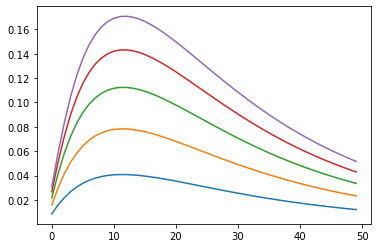

In [25]:
plt.plot(W)

In [219]:
#http://gli.lu/2017/12/smith-wilson-yield-curves/

In [26]:
t_array=np.array(list(range(1,51)))
A=np.exp(-ufr*t_array)
A.shape #discount factors

(50,)

In [27]:
W.shape

(50, 5)

In [28]:
zeta.shape

(4,)

In [29]:
B=zeta.T@C.T@W.T
B.shape

(50,)

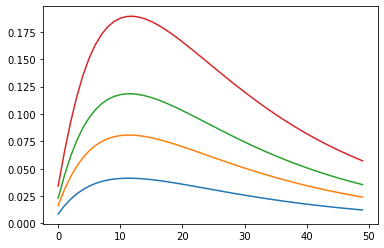

In [30]:
plt.plot((C.T@W.T).T)

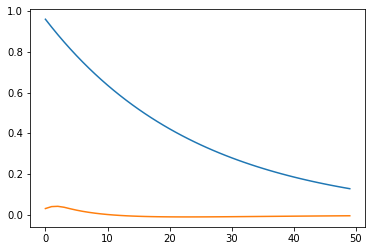

In [31]:
plt.plot(A,label='A')
plt.plot(B,label='B')

#"We see that the values of  B are almost negligible after a certain maturity t
# and thus P(t) converges to A.
#The interest rates converge therefore to the planned ultimate forward rate of 
#4.2 annually compounded."

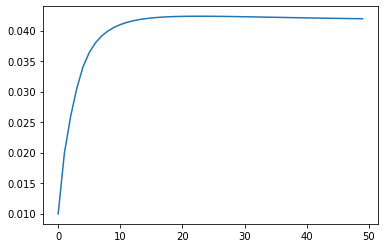

In [32]:
plt.plot(-1*np.log(A+B)/t_array)

## Build curve extend to 100 years

In [39]:
K=100

In [40]:
T=[]
for i in range(0,K):
    T.append(list(range(1,len(bonds)+2)))
T=np.array(T)

U=[]
for i in range(1,K+1):
    U.append((np.ones(5))*i)

In [41]:
min_tuj=np.minimum(T,U)
max_tuj=np.maximum(T,U)
tuj=T+U

In [42]:
second=(a*min_tuj)-(0.5*np.exp(-a*max_tuj))*(np.exp(a*min_tuj)-np.exp(-a*min_tuj))
W=np.exp(-ufr*tuj)*second
W.shape

(100, 5)

In [44]:
t_array=np.array(list(range(1,101)))
A=np.exp(-ufr*t_array) #discount factors
B=zeta.T@C.T@W.T

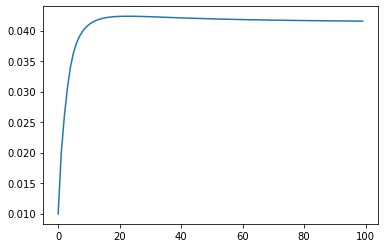

In [45]:
plt.plot(-1*np.log(A+B)/t_array)

In [49]:
yields=-1*np.log(A+B)/t_array

In [53]:
yc=pd.DataFrame(yields,columns=['YC'],index=list(range(2021,2121)))
yc

,YC
2021,0.009950
2022,0.019902
2023,0.025909
2024,0.030541
2025,0.034054
...,...
2116,0.041568
2117,0.041563
2118,0.041559
2119,0.041555


In [54]:
yc.to_csv("sample_yc_using_SW.csv")